<div style="text-align: right"> Last update: 07/31/2021 17:50 CDT </div>

### `Reading data and importing libraries`

In [1]:
from datetime import date

import pandas as pd
import numpy as np
from daten import WhatsappDaten, HistDaten

import matplotlib.pyplot as plt

refresh = ".07.2021"
path = "input data/"

# IMPORTANT: make sure that most recent date is of the Whatsapp-file
# Data up to jul 31
whats_file = "WhatsApp Chat with Tenemos.txt"
# Data up to jul 02
histo_file = "all_data_02-Jul-2021_1625202000.csv" 


save_allData = True

In [2]:
new_data = WhatsappDaten.read_data(path, whats_file, refresh)
historical = pd.read_csv(path+histo_file)
df = HistDaten.merge_data(historical, new_data, save_allData)

In [3]:
credit_hist = df[df.type.isin(["pcr"])].copy()
df = df[~df.type.isin(["pcr"])].copy()

In [4]:
credit_hist

,type,posteddate,transactiondate,currency,source,amount,vendor,memo,category,who,localcurrency
523,pcr,2021-07-13,2021-07-13,mxn,BBVA cr,1933.08,Bbva Cr,pago tarjeta de credito,Credito,Karina,mxn
541,pcr,2021-07-24,2021-07-24,mxn,BBVA cr,838.50,Bbva Cr,Pago de Tarjeta de Crédito,Credito,Karina,mxn
554,pcr,2021-07-31,2021-07-31,mxn,BBVA cr,108.31,Bbva Cr,Pago de Tarjeta de Crédito,Credito,Karina,mxn


#### Importante

El valor de 1 punto es de $ 0.07 mxn

---
---

<h1>
    <center>
    Karina & Carlos Data Analysis
    </center>
</h1>

#### All Time

In [5]:
HistDaten.print_spendInfo(df,"mxn")
print("\n")
HistDaten.print_spendInfo(df,"eur")

CURRENT AMOUNT: mxn 92,066.34
NON-ESSENTIAL SPEND, PERCENTAGE: 31.12%
SAVINGS, PERCENTAGE: 29.1%


CURRENT AMOUNT: eur 8,259.86
NON-ESSENTIAL SPEND, PERCENTAGE: 13.11%
SAVINGS, PERCENTAGE: 59.69%


In [6]:
HistDaten.print_spendInfo(df,"mxn","Karina")

Karina's Data
CURRENT AMOUNT: mxn 97,291.69
NON-ESSENTIAL SPEND, PERCENTAGE: 30.68%
SAVINGS, PERCENTAGE: 39.45%


In [7]:
HistDaten.print_spendInfo(df,"eur","Carlos")

Carlos's Data
CURRENT AMOUNT: eur 9,209.86
NON-ESSENTIAL SPEND, PERCENTAGE: 13.11%
SAVINGS, PERCENTAGE: 66.56%


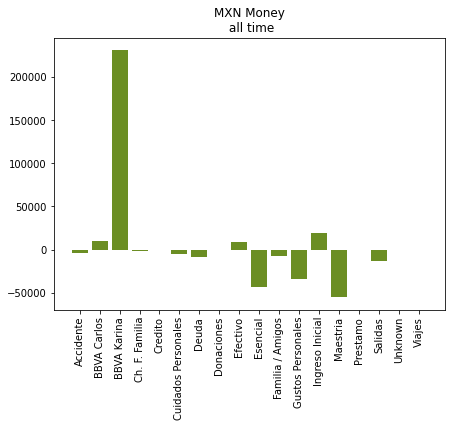

,amount
category,
BBVA Karina,231031.640
Ingreso Inicial,18971.340
BBVA Carlos,10000.000
Efectivo,8700.000
Unknown,-38.000
Prestamo,-135.470
Donaciones,-299.000
Credito,-789.630
Viajes,-885.870


In [8]:
HistDaten.category(df,"mxn",plot=True, colour="olivedrab")

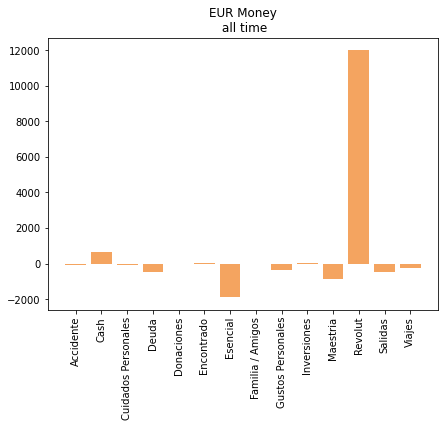

,amount
category,
Revolut,12000.00
Cash,676.10
Inversiones,50.78
Encontrado,20.00
Familia / Amigos,-18.54
Donaciones,-21.00
Accidente,-53.30
Cuidados Personales,-95.99
Viajes,-230.29


In [9]:
HistDaten.category(df,"eur",plot=True, colour="sandybrown")

### Quality Checks

In [10]:
new_data.type.unique()

array(['out', 'inf', 'pcr'], dtype=object)

### Karina Analysis

In [11]:
kar = df[df.who.isin(["Karina"])]
kar_cats = kar.groupby('category').sum()

In [12]:
ess = [ "Esencial", "Maestria"]
non_ess = [
    x for x in list(kar_cats.index) \
    if x not in (["BBVA Karina", "Ch. F. Familia"] + ess)
]

In [13]:
(kar_cats.loc[ess].amount.sum()/kar_cats.loc["BBVA Karina"].amount)*-100

25.428908533975942

In [14]:
(kar_cats.loc[non_ess].amount.sum()/kar_cats.loc["BBVA Karina"].amount)*-100

27.507758534867904

In [15]:
(kar_cats.loc["Gustos Personales"].values[0] / kar_cats.loc["BBVA Karina"].values[0])*-100

13.859508322094433

In [16]:
(kar[kar.memo.isin(["Tatuaje"])].amount.sum() / kar_cats.loc["BBVA Karina"].values[0])*-100

9.154486101006063

In [17]:
kar[kar.category.isin(["Ch. F. Familia"]) & (kar.transactiondate.dt.month > 5)]

,type,posteddate,transactiondate,currency,source,amount,vendor,memo,category,who,localcurrency
440,out,nan,2021-06-07,mxn,BBVA,-239.00,Caseta,Caseta Santa Cecilia,Ch. F. Familia,Karina,nan
441,out,nan,2021-06-07,mxn,BBVA,-500.00,PetroMax,Gasolina,Ch. F. Familia,Karina,nan
443,inf,2021-06-08,2021-06-08,mxn,BBVA,2000.00,Rodolfo (Papá),Gastos Familiares,Ch. F. Familia,Karina,nan
446,out,2021-06-24,2021-06-11,mxn,BBVA,-1000.00,Dra. Dalia Denisse Ng Aleman,Cita Ojos,Ch. F. Familia,Karina,nan
470,inf,2021-06-24,2021-06-22,mxn,BBVA,2000.00,Rodolfo (Papá),Gastos Familiares,Ch. F. Familia,Karina,nan
472,out,2021-06-24,2021-06-23,mxn,BBVA,-900.72,Farmacias Guadalajara,Medicina,Ch. F. Familia,Karina,nan
473,out,2021-06-27,2021-06-25,mxn,BBVA,-500.00,PetroMax,Gasolina,Ch. F. Familia,Karina,nan
479,out,2021-06-30,2021-06-26,mxn,BBVA,-738.10,El Socialista,Comida,Ch. F. Familia,Karina,nan
488,out,2021-06-30,2021-06-30,mxn,BBVA,-1000.00,Adriana (Mamá),Prestamo,Ch. F. Familia,Karina,nan
491,out,2021-07-01,2021-06-30,mxn,BBVA cr,-500.00,PetroMax,Gasolina,Ch. F. Familia,Karina,nan


In [18]:
kar[kar.category.isin(["Ch. F. Familia"])].amount.sum()

-1800.25

---

# 50/20/30 rule

* The 50-20-30 (or 50-30-20) budget rule is an intuitive and simple plan to help people reach their financial goals.
* The rule states that you should spend up to 50% of your after-tax income on needs and obligations that you must-have or must-do.
* The remaining half should be split up between 20% savings and debt repayment and 30% to everything else that you might want.
* The rule is a template that is intended to help individuals manage their money and save for emergencies and retirement.

[Investopedia](https://www.investopedia.com/ask/answers/022916/what-502030-budget-rule.asp#:~:text=Senator%20Elizabeth%20Warren%20popularized%20the,socking%20away%2020%25%20to%20savings.)